# Merdional Heat Transport

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cosima_cookbook as cc
from mpl_toolkits.basemap import Basemap, shiftgrid
import numpy as np
import pandas as pd
import netCDF4 as nc
import xarray as xr
import re # extract string

netcdf_index loaded.


In [2]:
from joblib import Memory

memory = Memory(cachedir='/g/data1/v45/cosima-cookbook/', verbose=0)

In [3]:
#cc.build_index()
configuration = 'mom01v5'
#configuration = 'mom025'

expts = cc.get_experiments(configuration)
display(expts)

['GFDL50',
 'KDS75',
 'KDS75_PI',
 'KDS75_UP',
 'KDS75_WOA13',
 'KDS75_newbathy_CORE',
 'KDS75_newbathy_JRA',
 'KDS75_newbathy_JRA_runoff',
 'KDS75_salt10days',
 'KDS75_saltfluxes',
 'KDS75_wind']

In [4]:
expt = 'KDS75_newbathy_JRA_runoff' 

In [5]:
## Load temp_yflux_adv_int_z from expt, pick up one year, annual mean and sum xt_ocean
mht = cc.get_nc_variable(expt, 'ocean_month.nc', 'temp_yflux_adv_int_z',n=3, time_units = 'days since 1901-01-01').mean('time')
mht = mht*1e-15
mht_xsum = mht.sum('xt_ocean')
mht.shape

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=3), HTML(value='')))

(2700, 3600)

## Read basin data
Here use NCL script basin.ncl to create basin data (Index: 1 for the Pacific Ocean, 2 for the Atlantic Ocean, 3 for the Indian Ocean.

!!!NOTE: This basin file is ONLY for testing. This version is NOT satisfied. 

In [6]:
# Read basin data
#####################
# INDEX:
#1 Southern Ocean 
#2 Pacific Ocean 
#3 Indian Ocean 
#4 Persian Gulf
#-5 Red Sea 
#6 Atlantic Ocean
#7 Mediterranean Sea 
#8 Labrador Sea 
#9 GIN Sea 
#10 Arctic Ocean 
#11 Hudson Bay 
#-12 Baltic Sea 
#-13 Black Sea 
#-14 Caspian Sea 
#basin = xr.open_dataset('/g/data3/hh5/tmp/cosima/observations/original/MHT/popMask.2700x3600.nc').basin
#####################
# Pacific: 1
# Atlantic: 2
# Indian: 3
#####################
basin = xr.open_dataset('/g/data3/hh5/tmp/cosima/observations/original/MHT/KDS75_01/basin.nc').basin
#print(basin[1000:1100,2400:2500])

## Atlantic Ocean
mask_a = basin!=2
mht_a = np.ma.array(mht,mask=mask_a)
#mht_a[np.isnan(mht_a)] = 0
#mht_a_xsum = np.sum(np.ma.fix_invalid(mht_a),axis=1)
mht_a_xsum = np.sum(mht_a,axis=1)
#print(mht_a[1000:1100,2400:2500])
print(mht_a_xsum[1000:1100])

# Pacific-Indian Ocean
mask_ip = (basin!=1)&(basin!=3)
mht_ip = np.ma.array(mht,mask=mask_ip)
#mht_ip[np.isnan(mht_ip)] = 0
#mht_ip_xsum = np.sum(np.ma.fix_invalid(mht_ip),axis=1)
mht_ip_xsum = np.sum(mht_ip,axis=1)
#print(basin[1000:1100,2400:2500])


/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[0.511225329236928 0.5132371058429761 0.5153708989557334 0.5176186994565333
 0.5199827598906934 0.5223489195770055 0.5246781310923507
 0.5269867798314134 0.529229194382528 0.5313526448211507 0.5334636122577281
 0.5355551913987533 0.5375543632001226 0.5394657728883947
 0.5413162271045975 0.5431305943748307 0.5448811172318854
 0.5464919850667094 0.547948855283424 0.549310341365376 0.5505847338269227
 0.5517931734496855 0.5529723528751574 0.5541198034872108
 0.5552236068417974 0.5563055764454826 0.5573818889242027
 0.5584114313200641 0.5593983052246614 0.56038665385216 0.5613747271870506
 0.5623795134278827 0.5634430171952426 0.5645814453040054
 0.5657680774029253 0.5670152308885601 0.5683083510190721 0.569645265065856
 0.5710373800170561 0.5724669109558508 0.573929935080224 0.575453170903392
 0.5770947420695874 0.5788277572416234 0.5805334040587521
 0.5822126954725827 0.5838864876047041 0.5855181332320853
 0.5871340439594881 0.588750455259904 0.5903894775314517 0.592052862610752
 0.59374

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


### Read ERBE Period Ocean and Atmospheric Heat Transport

In [7]:
erbe_mht = []
erbe_lat = []

filename = '/g/data3/hh5/tmp/cosima/observations/original/MHT/obs_vq_am_estimates.txt'

with open(filename) as f:

#   n = len(f.readlines())
    for line in f.readlines()[1:96]:
        #line=line.replace('\n','').split(",")
        line = line.strip()
        sline = line.split()
        erbe_lat.append(float(sline[0]))
        erbe_mht.append(float(sline[3]))
print(erbe_mht)        

[7.82256e-05, -0.00548183, -0.00534277, -0.00778958, -0.0153764, -0.0189109, -0.0172473, -0.0321044, -0.0647783, -0.104008, -0.129806, -0.202605, -0.297446, -0.374377, -0.424618, -0.464923, -0.508466, -0.544651, -0.56517, -0.575634, -0.563567, -0.51931, -0.45106, -0.377069, -0.310393, -0.271679, -0.279999, -0.329881, -0.39744, -0.464742, -0.515384, -0.565431, -0.620221, -0.678495, -0.736833, -0.790937, -0.843637, -0.90752, -0.984516, -1.05272, -1.0956, -1.10212, -1.05218, -0.93882, -0.761357, -0.502307, -0.155427, 0.253559, 0.666604, 1.00846, 1.25254, 1.42962, 1.57235, 1.69269, 1.78862, 1.84355, 1.85095, 1.82898, 1.79722, 1.76105, 1.71365, 1.65596, 1.59826, 1.53441, 1.45553, 1.34517, 1.20096, 1.03473, 0.856831, 0.704894, 0.62273, 0.602973, 0.60382, 0.602437, 0.599438, 0.588678, 0.573292, 0.5557, 0.518399, 0.46073, 0.40554, 0.361088, 0.328643, 0.303888, 0.271855, 0.232879, 0.18562, 0.146825, 0.110927, 0.0737569, 0.0460509, 0.0254577, 0.0100299, 0.00272631, 0.000137086]


### Read NCEP and ECMWF Oceanic and Atmospheric Transport Products

In [8]:
ncep_g_mht = []
ecwmf_g_mht = []
ncep_g_err = []
ecwmf_g_err = []
ncep_a_mht = []
ecwmf_a_mht = []
ncep_a_err = []
ecwmf_a_err = []
ncep_p_mht = []
ecwmf_p_mht = []
ncep_p_err = []
ecwmf_p_err = []
ncep_i_mht = []
ecwmf_i_mht = []
ncep_i_err = []
ecwmf_i_err = []
ncep_ip_mht = []
ecwmf_ip_mht = []
ncep_ip_err = []
ecwmf_ip_err = []
o_lat = []

filename = '/g/data3/hh5/tmp/cosima/observations/original/MHT/ANNUAL_TRANSPORTS_1985_1989.ascii'

with open(filename) as f:

#   n = len(f.readlines())
    for line in f.readlines()[1:]:
        #line=line.replace('\n','').split(",")
        line = line.strip()
        sline = line.split()
        o_lat.append(float(sline[0])*0.01)  # T42 latitudes (north to south)
        ncep_g_mht.append(float(sline[4])*0.01) # Residual Ocean Transport - NCEP
        ecwmf_g_mht.append(float(sline[5])*0.01)# Residual Ocean Transport - ECWMF
        ncep_a_mht.append(float(sline[7])*0.01)# Atlantic Ocean Basin Transport - NCEP
        ncep_p_mht.append(float(sline[8])*0.01)# Pacific Ocean Basin Transport - NCEP
        ncep_i_mht.append(float(sline[9])*0.01)# Indian Ocean Basin Transport - NCEP
        ncep_g_err.append(float(sline[10])*0.01)# Error Bars for NCEP Total Transports
        ncep_a_err.append(float(sline[11])*0.01)# Error Bars for NCEP Atlantic Transports 
        ncep_p_err.append(float(sline[12])*0.01)# Error Bars for NCEP Pacific Transports 
        ncep_i_err.append(float(sline[13])*0.01)# Error Bars for NCEP Indian Transports 
        ecwmf_a_mht.append(float(sline[15])*0.01)# Atlantic Ocean Basin Transport - ECWMF
        ecwmf_p_mht.append(float(sline[16])*0.01)# Pacific Ocean Basin Transport - ECWMF
        ecwmf_i_mht.append(float(sline[17])*0.01)# Indian Ocean Basin Transport - ECWMF
        ecwmf_g_err.append(float(sline[18])*0.01)# Error Bars for ECWMF Total Transports
        ecwmf_a_err.append(float(sline[19])*0.01)# Error Bars for NCEP Atlantic Transports
        ecwmf_p_err.append(float(sline[20])*0.01)# Error Bars for NCEP Pacific Transports
        ecwmf_i_err.append(float(sline[21])*0.01)# Error Bars for NCEP Indian Transports      
ncep_ip_mht = [a+b for a, b in zip(ncep_p_mht,ncep_i_mht)]
ecwmf_ip_mht = [a+b for a, b in zip(ecwmf_p_mht,ecwmf_i_mht)]
ncep_ip_err = [max(a,b) for a, b in zip(ncep_p_err,ncep_i_err)]
ecwmf_ip_err = [max(a,b) for a, b in zip(ecwmf_p_err,ecwmf_i_err)]
len(ncep_ip_mht)

64

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


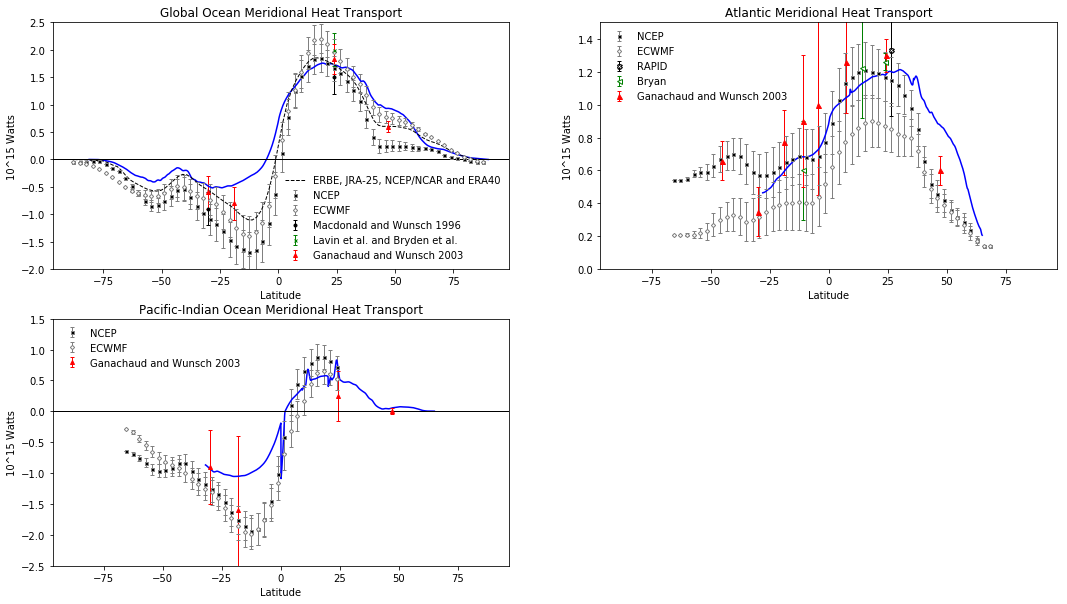

In [9]:
fig = plt.figure(figsize=(18,10))

ax = fig.add_subplot(2, 2, 1)
ax.plot(mht.yu_ocean, mht_xsum,'b', label="")
ax.plot(erbe_lat, erbe_mht, 'k--', linewidth=1, label="ERBE, JRA-25, NCEP/NCAR and ERA40")
plt.errorbar(o_lat[::-1], ncep_g_mht[::-1], yerr=ncep_g_err[::-1], c='gray', fmt='s', markerfacecolor='k', markersize=3, capsize=2, linewidth=1, label="NCEP")
plt.errorbar(o_lat[::-1], ecwmf_g_mht[::-1], yerr=ecwmf_g_err[::-1], c='gray', fmt='D', markerfacecolor='white', markersize=3, capsize=2, linewidth=1, label="ECWMF")
plt.errorbar(24, 1.5, yerr=0.3, fmt='o', c='black', markersize=3, capsize=2, linewidth=1, label="Macdonald and Wunsch 1996")
plt.errorbar(-30, -0.9, yerr=0.3, fmt='o', c='black', markersize=3, capsize=2, linewidth=1)
plt.errorbar(24, 2.0, yerr=0.3, fmt='x', c='green', markersize=3, capsize=2, linewidth=1, label="Lavin et al. and Bryden et al.")
plt.errorbar(24, 1.83, yerr=0.28, fmt='^', c='red', markersize=4, capsize=2, linewidth=1, label="Ganachaud and Wunsch 2003")
plt.errorbar(-30, -0.6, yerr=0.3, fmt='^', c='red', markersize=4, capsize=2, linewidth=1)
plt.errorbar(-19, -0.8, yerr=0.3, fmt='^', c='red', markersize=4, capsize=2, linewidth=1)
plt.errorbar(47, 0.6, yerr=0.1, fmt='^', c='red', markersize=4, capsize=2, linewidth=1)
plt.legend(frameon=False, fontsize=10)
plt.axhline(y=0, linewidth=1, color='black')
plt.ylim(-2,2.5)
#plt.grid()
plt.title('Global Ocean Meridional Heat Transport', fontsize=12)
plt.xlabel('Latitude')
plt.ylabel('10^15 Watts')

ax = fig.add_subplot(2, 2, 2)
ax.plot(mht.yu_ocean, mht_a_xsum,'b', label="")
#plt.scatter(o_lat[::-1], ncep_a_mht[::-1], marker='s', s=10, facecolors='none', edgecolors='gray', label="NCEP")
#plt.scatter(o_lat[::-1], ecwmf_a_mht[::-1], marker='D', s=10, facecolors='none', edgecolors='gray', label="ECWMF")
plt.errorbar(o_lat[::-1], ncep_a_mht[::-1], yerr=ncep_a_err[::-1], c='gray', fmt='s', markerfacecolor='k', markersize=3, capsize=2, linewidth=1, label="NCEP")
plt.errorbar(o_lat[::-1], ecwmf_a_mht[::-1], yerr=ecwmf_a_err[::-1], c='gray', fmt='D', markerfacecolor='white', markersize=3, capsize=2, linewidth=1, label="ECWMF")
plt.errorbar(26.5, 1.33, yerr=0.4, fmt='X', c='k', markerfacecolor='white', markersize=5, capsize=2, linewidth=1, label="RAPID")
plt.errorbar(14, 1.22, yerr=0.3, fmt='<', c='g', markerfacecolor='white', markersize=5, capsize=2, linewidth=1, label="Bryan")
plt.errorbar(24, 1.26, yerr=0.05, fmt='<', c='g', markerfacecolor='white', markersize=5, capsize=2, linewidth=1)
plt.errorbar(-11, 0.6, yerr=0.3, fmt='<', c='g', markerfacecolor='white', markersize=5, capsize=2, linewidth=1)
plt.errorbar(47, 0.6, yerr=0.09, fmt='^', c='red', markersize=5, capsize=2, linewidth=1, label="Ganachaud and Wunsch 2003")
plt.errorbar(24.1, 1.3, yerr=0.1, fmt='^', c='red', markersize=5, capsize=2, linewidth=1)
plt.errorbar(7.5, 1.26, yerr=0.31, fmt='^', c='red', markersize=5, capsize=2, linewidth=1)
plt.errorbar(-4.5, 1., yerr=0.55, fmt='^', c='red', markersize=5, capsize=2, linewidth=1)
plt.errorbar(-11, 0.9, yerr=0.4, fmt='^', c='red', markersize=5, capsize=2, linewidth=1)
plt.errorbar(-19, 0.77, yerr=0.2, fmt='^', c='red', markersize=5, capsize=2, linewidth=1)
plt.errorbar(-30, 0.35, yerr=0.15, fmt='^', c='red', markersize=5, capsize=2, linewidth=1)
plt.errorbar(-45, 0.66, yerr=0.12, fmt='^', c='red', markersize=5, capsize=2, linewidth=1)
plt.ylim(0,1.5)
plt.legend(frameon=False, fontsize=10)
#plt.grid()
plt.title('Atlantic Meridional Heat Transport', fontsize=12)
plt.xlabel('Latitude')
plt.ylabel('10^15 Watts')

ax = fig.add_subplot(2, 2, 3)
ax.plot(mht.yu_ocean, mht_ip_xsum,'b', label="")
plt.errorbar(o_lat[::-1], ncep_ip_mht[::-1], yerr=ncep_ip_err[::-1], c='gray', fmt='s', markerfacecolor='k', markersize=3, capsize=2, linewidth=1, label="NCEP")
plt.errorbar(o_lat[::-1], ecwmf_ip_mht[::-1], yerr=ecwmf_ip_err[::-1], c='gray', fmt='D', markerfacecolor='white', markersize=3, capsize=2, linewidth=1, label="ECWMF")
plt.errorbar(47, 0., yerr=0.05, fmt='^', c='red', markersize=4, capsize=2, linewidth=1, label="Ganachaud and Wunsch 2003")
plt.errorbar(24., 0.25, yerr=0.4, fmt='^', c='red', markersize=4, capsize=2, linewidth=1)
plt.errorbar(-18, -1.6, yerr=1.2, fmt='^', c='red', markersize=4, capsize=2, linewidth=1)
plt.errorbar(-30, -0.9, yerr=0.6, fmt='^', c='red', markersize=4, capsize=2, linewidth=1)
plt.ylim(-2.5,1.5)
plt.legend(frameon=False, fontsize=10)
plt.axhline(y=0, linewidth=1, color='black')
#plt.grid()
plt.title('Pacific-Indian Ocean Meridional Heat Transport', fontsize=12)
plt.xlabel('Latitude')
plt.ylabel('10^15 Watts')

plt.savefig('mht.png')